In [1]:
import models
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.text

In [2]:
def plot_and_test_stationary(
    num_classes,
    num_servers,
    arrival_rates,
    service_rates,
    class_change_rate_matrix,
    max_simulation_time,
    warmup,
    cooldown,
    ax,
    fontsize,
    label=None,
):
    Q = models.build_and_run_simulation(
        num_classes=num_classes,
        num_servers=num_servers,
        arrival_rates=arrival_rates,
        service_rates=service_rates,
        class_change_rate_matrix=class_change_rate_matrix,
        max_simulation_time=max_simulation_time,
        progress_bar=True,
    )

    p_value = models.adf_test_on_simulation(Q, max_simulation_time, warmup, cooldown)

    ts = [row[0] for row in Q.statetracker.history]
    ns = [sum(row[1][0]) for row in Q.statetracker.history]
    ax.plot(ts, ns, c="black", label=f"p-val = {round(p_value, 5)}")
    ax.set_xlabel("Time", fontsize=fontsize)
    ax.set_ylabel("Number of Customers", fontsize=fontsize)
    ax.set_ylim(bottom=0)
    ymin, ymax = ax.get_ylim()
    ax.vlines(
        [warmup, max_simulation_time - cooldown],
        ymin,
        ymax,
        linestyle="dotted",
        color="grey",
    )
    ax.legend(frameon=True, fontsize=fontsize, loc=9)
    if label is not None:
        ax.annotate(
            label, (0.05, 0.85), xycoords="axes fraction", fontsize=fontsize + 4
        )
    return ax, p_value

100%|███████████████████████████████████| 400.0/400 [00:00<00:00, 2814.62it/s]


0.0003982984078649209


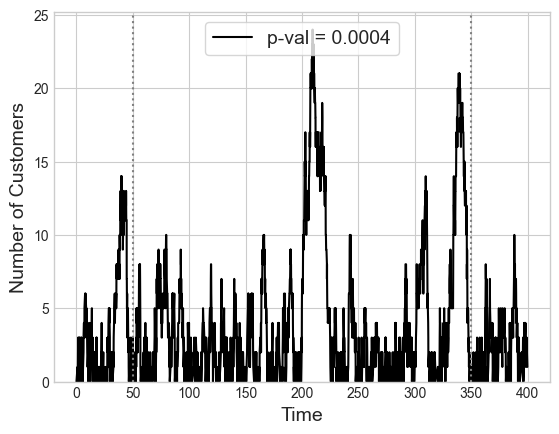

In [3]:
fig, ax = plt.subplots(1)
ax, pvalue = plot_and_test_stationary(
    num_classes=2,
    num_servers=1,
    arrival_rates=[2, 1],
    service_rates=[4, 4],
    class_change_rate_matrix=[[None, 1], [1, None]],
    max_simulation_time=400,
    warmup=50,
    cooldown=50,
    ax=ax,
    fontsize=14,
)
fig.savefig("../tex/img/adf_test_steadystate.pdf")
print(pvalue)

100%|████████████████████████████████████| 400.0/400 [00:03<00:00, 125.80it/s]


0.9960557113161541


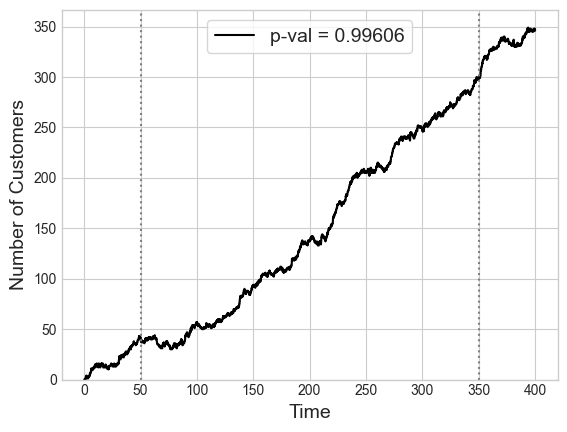

In [4]:
fig, ax = plt.subplots(1)
ax, pvalue = plot_and_test_stationary(
    num_classes=2,
    num_servers=2,
    arrival_rates=[2, 1],
    service_rates=[1, 1],
    class_change_rate_matrix=[[None, 1], [1, None]],
    max_simulation_time=400,
    warmup=50,
    cooldown=50,
    ax=ax,
    fontsize=14,
)
fig.savefig("../tex/img/adf_test_not_steadystate.pdf")
print(pvalue)

# Investigate 'gap' in Theorem

Consider four six cases where we are in the 'gap' in our theorem:
 + $\lambda_1 = \lambda_2 = 2$, $c = 1$ and $\mu_1 = 3$ and $\mu_2 = 5$ (A)
   + $\theta_{12} = 1$, $\theta_{21} = 0$ (a)
   + $\theta_{12} = \theta_{21} = 1$ (b)
   + $\theta_{12} = 0$, $\theta_{21} = 1$ (c)
 + $\lambda_1 = \lambda_2 = 2$, $c = 1$ and $\mu_1 = 5$ and $\mu_2 = 1$ (B)
   + $\theta_{12} = 1$, $\theta_{21} = 0$ (a)
   + $\theta_{12} = \theta_{21} = 1$ (b)
   + $\theta_{12} = 0$, $\theta_{21} = 1$ (c)

In [5]:
params = {
    "A": {
        "a": {
            "num_classes": 2,
            "num_servers": 1,
            "arrival_rates": [2, 2],
            "service_rates": [3, 5],
            "class_change_rate_matrix": [[None, 1], [None, None]],
            "max_simulation_time": 400,
            "warmup": 50,
            "cooldown": 50,
        },
        "b": {
            "num_classes": 2,
            "num_servers": 1,
            "arrival_rates": [2, 2],
            "service_rates": [3, 5],
            "class_change_rate_matrix": [[None, 1], [1, None]],
            "max_simulation_time": 400,
            "warmup": 50,
            "cooldown": 50,
        },
        "c": {
            "num_classes": 2,
            "num_servers": 1,
            "arrival_rates": [2, 2],
            "service_rates": [3, 5],
            "class_change_rate_matrix": [[None, None], [1, None]],
            "max_simulation_time": 400,
            "warmup": 50,
            "cooldown": 50,
        },
    },
    "B": {
        "a": {
            "num_classes": 2,
            "num_servers": 1,
            "arrival_rates": [2, 2],
            "service_rates": [5, 3],
            "class_change_rate_matrix": [[None, 1], [None, None]],
            "max_simulation_time": 400,
            "warmup": 50,
            "cooldown": 50,
        },
        "b": {
            "num_classes": 2,
            "num_servers": 1,
            "arrival_rates": [2, 2],
            "service_rates": [5, 3],
            "class_change_rate_matrix": [[None, 1], [1, None]],
            "max_simulation_time": 400,
            "warmup": 50,
            "cooldown": 50,
        },
        "c": {
            "num_classes": 2,
            "num_servers": 1,
            "arrival_rates": [2, 2],
            "service_rates": [5, 3],
            "class_change_rate_matrix": [[None, None], [1, None]],
            "max_simulation_time": 400,
            "warmup": 50,
            "cooldown": 50,
        },
    },
}

100%|███████████████████████████████████| 400.0/400 [00:00<00:00, 2916.03it/s]
100%|█████████████████████████████████████| 400.0/400 [00:04<00:00, 94.18it/s]
100%|███████████████████████████████████| 400.0/400 [00:00<00:00, 1802.67it/s]
100%|███████████████████████████████████| 400.0/400 [00:00<00:00, 2472.06it/s]
100%|███████████████████████████████████| 400.0/400 [00:00<00:00, 2381.35it/s]
100%|███████████████████████████████████| 400.0/400 [00:00<00:00, 2834.79it/s]


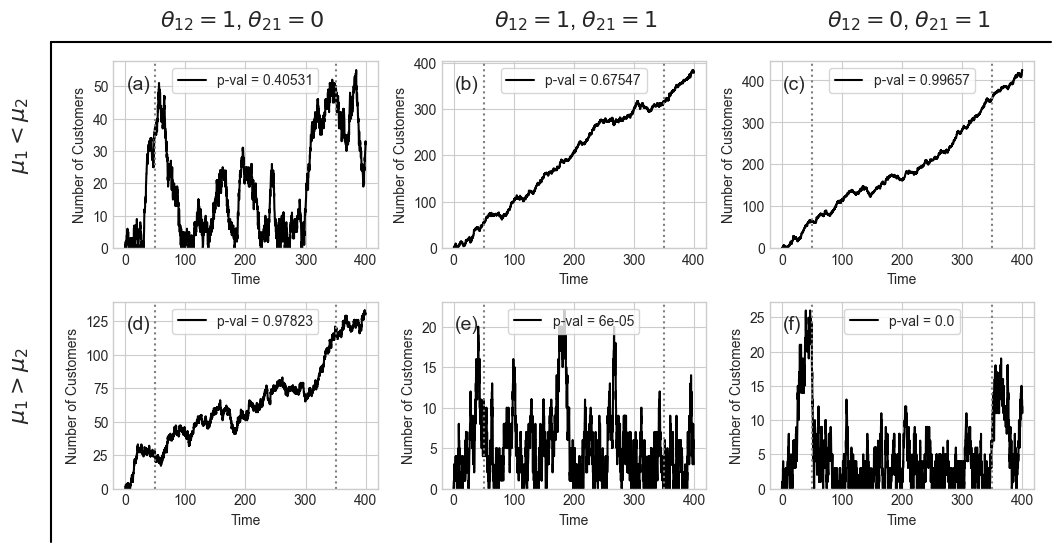

In [6]:
fig, axarr = plt.subplots(2, 3, figsize=(10, 5))
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
li = 0
for i, L in enumerate(["A", "B"]):
    for j, l in enumerate(["a", "b", "c"]):
        plot_and_test_stationary(
            ax=axarr[i][j], **params[L][l], fontsize=10, label=labels[li]
        )
        li += 1
fig.add_artist(lines.Line2D([0, 0], [1, 0], color="black"))
fig.add_artist(lines.Line2D([1, 0], [1, 1], color="black"))
fig.add_artist(
    matplotlib.text.Text(
        x=1 / 6 + 1 / 40,
        y=1.03,
        text=r"$\theta_{12} = 1$, $\theta_{21} = 0$",
        fontsize=16,
        horizontalalignment="center",
    )
)
fig.add_artist(
    matplotlib.text.Text(
        x=3 / 6 + 1 / 40,
        y=1.03,
        text=r"$\theta_{12} = 1$, $\theta_{21} = 1$",
        fontsize=16,
        horizontalalignment="center",
    )
)
fig.add_artist(
    matplotlib.text.Text(
        x=5 / 6 + 1 / 40,
        y=1.03,
        text=r"$\theta_{12} = 0$, $\theta_{21} = 1$",
        fontsize=16,
        horizontalalignment="center",
    )
)
fig.add_artist(
    matplotlib.text.Text(
        x=-0.03,
        y=1 / 4,
        text=r"$\mu_1 > \mu_2$",
        fontsize=16,
        rotation=90,
        horizontalalignment="center",
    )
)
fig.add_artist(
    matplotlib.text.Text(
        x=-0.03,
        y=3 / 4,
        text=r"$\mu_1 < \mu_2$",
        fontsize=16,
        rotation=90,
        horizontalalignment="center",
    )
)
plt.tight_layout()
fig.savefig("../tex/img/adf_theorem_gap.pdf", bbox_inches="tight")